In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from cycler import cycler


In [2]:
df = pd.read_csv("GAVIA_main_data_table.csv", encoding='latin-1')
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 500)

In [3]:
df.head(5)

,RecordID,SpeciesID,Order,Family,Genus,Species,Binomial,CommonName,CountryName,AreaName1,AreaName2,LocationDescription,Realm,Island,LandType,CPrecord,IntroducedDate,IntroducedDateGrouped,MappingDate,ReferenceDate,StatusCat,IntroMethod,IntroPurpose,TaxonomicNotes,Notes,RangeMap,Reference,CompilerInitial
0,1,1439,Psittaciformes,Psittacidae,Melopsittacus,undulatus,Melopsittacus undulatus,Budgerigar,OMAN,NaN,NaN,NaN,Afrotropical,False,Mainland,False,NaN,NaN,NaN,NaN,Unsuccessful,Unknown,Unknown.Not applicable,NaN,NaN,Not Mapped,"{Juniper, 1998 #209}",MP
1,2,1439,Psittaciformes,Psittacidae,Melopsittacus,undulatus,Melopsittacus undulatus,Budgerigar,UNITED STATES,Hawaiian Islands,Hawai'i,NaN,Oceanic,True,Oceanic.Island,False,NaN,NaN,1998.0,NaN,Unsuccessful,Unknown,Unknown.Not applicable,NaN,NaN,Mapped,"{Juniper, 1998 #209}",MP
2,3,1439,Psittaciformes,Psittacidae,Melopsittacus,undulatus,Melopsittacus undulatus,Budgerigar,UNITED STATES,California,NaN,NaN,Nearctic,False,Mainland,False,NaN,NaN,NaN,NaN,Unsuccessful,Unknown,Unknown.Not applicable,NaN,NaN,Not Mapped,"{Juniper, 1998 #209}",MP
3,4,1439,Psittaciformes,Psittacidae,Melopsittacus,undulatus,Melopsittacus undulatus,Budgerigar,UNITED STATES,Florida,Pinellas,St. Petersburg Area,Nearctic,False,Mainland,True,1950,1950.0,1950.0,NaN,Established,Unknown,Unknown.Not applicable,NaN,NaN,Mapped,"{Juniper, 1998 #209}",MP
4,5,1439,Psittaciformes,Psittacidae,Melopsittacus,undulatus,Melopsittacus undulatus,Budgerigar,UNITED STATES,Florida,NaN,Jacksonville to Miami,Nearctic,False,Mainland,False,NaN,NaN,1998.0,NaN,Established,Unknown,Unknown.Not applicable,NaN,NaN,Mapped,"{Juniper, 1998 #209}",MP


In [4]:
df.shape

(27723, 28)

In [5]:
df.dtypes

RecordID                   int64
SpeciesID                  int64
Order                     object
Family                    object
Genus                     object
Species                   object
Binomial                  object
CommonName                object
CountryName               object
AreaName1                 object
AreaName2                 object
LocationDescription       object
Realm                     object
Island                      bool
LandType                  object
CPrecord                    bool
IntroducedDate            object
IntroducedDateGrouped    float64
MappingDate              float64
ReferenceDate            float64
StatusCat                 object
IntroMethod               object
IntroPurpose              object
TaxonomicNotes            object
Notes                     object
RangeMap                  object
Reference                 object
CompilerInitial           object
dtype: object

In [6]:
#Looking at the earliest entries
df.sort_values(by='IntroducedDateGrouped').head()

,RecordID,SpeciesID,Order,Family,Genus,Species,Binomial,CommonName,CountryName,AreaName1,AreaName2,LocationDescription,Realm,Island,LandType,CPrecord,IntroducedDate,IntroducedDateGrouped,MappingDate,ReferenceDate,StatusCat,IntroMethod,IntroPurpose,TaxonomicNotes,Notes,RangeMap,Reference,CompilerInitial
6413,6701,235,Galliformes,Phasianidae,Gallus,gallus,Gallus gallus,Red Junglefowl,UNITED STATES,Hawaiian Islands,NaN,NaN,Oceanic,True,Oceanic.Island,False,500AD,500.0,2005.0,NaN,Established,Escaped,Agriculture,NaN,AD 500 - domestic fowl brought to Hawaii\nLate C18th established wild popns recorded.\nNow only survive in wild on Kauai and small popn on Oahu.,Mapped,"{Lever, 2005 #385}",ED
11468,11800,235,Galliformes,Phasianidae,Gallus,gallus,Gallus gallus,Red Junglefowl,SOUTH AFRICA,NaN,NaN,"Gravelotte, NE Transvaal lowveld",Afrotropical,False,Mainland,True,<800 AD,799.0,799.0,NaN,Unknown,Unknown,Unknown.Not applicable,NaN,Kept in S.A. since <800 AD,Mapped,"{Brooke, 1986 #471}",EJ
6937,7235,5512,Passeriformes,Corvidae,Cyanocorax,dickeyi,Cyanocorax dickeyi,Tufted Jay,MEXICO,NaN,NaN,"Sierra Madre Occidental in C and NE Nayarit, SE Sinaloa, and SW Durango",Nearctic,False,Mainland,False,c.900 AD,900.0,900.0,NaN,Established,Unknown,Unknown.Not applicable,NaN,Arguments for how this population came into being. Relict popn? Storm-borne waifs? The theory of a pre-Columbian introduction are the most persuasive.,Mapped,"{Lever, 2005 #385}",ED
15728,16091,235,Galliformes,Phasianidae,Gallus,gallus,Gallus gallus,Red Junglefowl,COOK ISLANDS,NaN,NaN,NaN,Oceanic,True,Oceanic.Island,True,990,990.0,990.0,NaN,Established,Unknown,Unknown.Not applicable,NaN,"Introd. prehistorically\n1,000 B.P: earliest record from Aitutaki",Mapped,"{Steadman, 1990 #82}",FD
6666,6960,2354,Columbiformes,Columbidae,Columba,livia,Columba livia,Rock Pigeon,NaN,NaN,NaN,Mediterranean: All European countries as far N as 70'N in Norway.,Palearctic,False,Mainland,False,c.C11th,1050.0,NaN,NaN,Established,Unknown,Unknown.Not applicable,NaN,Current densities of 250 pairs km/sq,Not Mapped,"{Lever, 2005 #385}",ED


In [7]:
#That's weird, literature about the dataset says it goes back to 6000 BCE—how can I find that? Is it at the top?
df.sort_values(by='IntroducedDateGrouped', ascending=False).head()

,RecordID,SpeciesID,Order,Family,Genus,Species,Binomial,CommonName,CountryName,AreaName1,AreaName2,LocationDescription,Realm,Island,LandType,CPrecord,IntroducedDate,IntroducedDateGrouped,MappingDate,ReferenceDate,StatusCat,IntroMethod,IntroPurpose,TaxonomicNotes,Notes,RangeMap,Reference,CompilerInitial
27396,28255,9334,Passeriformes,Icteridae,Quiscalus,mexicanus,Quiscalus mexicanus,Great-tailed Grackle,ECUADOR,Galápagos,NaN,Puerto Ayora,Neotropical,True,Oceanic.Island,False,2010,2010.0,NaN,NaN,Unknown,Unknown,Unknown.Not applicable,NaN,2010: 1 bird intercepted/removed in Puerto Ayora,Not Mapped,"{Phillips, 2012 #931}",VF
26293,27112,133,Galliformes,Phasianidae,Alectoris,chukar,Alectoris chukar,Chukar,UNITED KINGDOM,NaN,NaN,England; Scotland; Wales,Palearctic,True,Continental.Island,False,late 1920s,2009.0,NaN,NaN,Breeding,Released,Unknown.Not applicable,NaN,"Late 1920s-early 1930s: introd. to Dawyck Park, Stobo, Peeblesshire; introd. Woburn Abbey and at Whipsnade, Bedfordshire; introd. Foxwarren Park, Surrey\nLate 1940s: breeding\nEarly 1970s: bred for hunting\nLate 1970s: est. on S. Downs, Sussex and Kent, and in Aberdeenshire, and some neighbouring counties\nLate 1990s: sm. popns. SW. and N. England, N. Scotland and in parts of Wales\n2009: Scottish popn. status unknown, may have died out",Not Mapped,"{Lever, 2009 #839}",FD
12531,12871,133,Galliformes,Phasianidae,Alectoris,chukar,Alectoris chukar,Chukar,UNITED ARAB EMIRATES,Abu Dhabi,NaN,Abu Al Abyad I.,Palearctic,False,Mainland,True,<2009,2008.0,2008.0,NaN,Breeding,Unknown,Unknown.Not applicable,NaN,"<2009: recent introd. on near shore Is. of UAE including Abu Al Abyad and Sir Baniyas, breeding confirmed at some sites",Mapped,"{Khan, 2009 #112}",FD
12532,12872,133,Galliformes,Phasianidae,Alectoris,chukar,Alectoris chukar,Chukar,UNITED ARAB EMIRATES,Abu Dhabi,NaN,Sir Bani Yas I.,Palearctic,False,Mainland,True,<2009,2008.0,2008.0,NaN,Breeding,Unknown,Unknown.Not applicable,NaN,"<2009: recent introd. on near shore Is. of UAE including Abu Al Abyad and Sir Baniyas, breeding confirmed at some sites",Mapped,"{Khan, 2009 #112}",FD
9014,9328,369,Anseriformes,Anatidae,Branta,canadensis,Branta canadensis,Canada Goose,PORTUGAL,NaN,NaN,NaN,Palearctic,False,Mainland,False,2008,2008.0,NaN,NaN,Unknown,Unknown,Unknown.Not applicable,NaN,"""Sometimes present"".",Not Mapped,"{GISD, 2005 #399}",RH


In [8]:
#Nope! Still couldn't find it—what about searching for BC?

df[df.IntroducedDate.str.contains('BC', na=False)]

,RecordID,SpeciesID,Order,Family,Genus,Species,Binomial,CommonName,CountryName,AreaName1,AreaName2,LocationDescription,Realm,Island,LandType,CPrecord,IntroducedDate,IntroducedDateGrouped,MappingDate,ReferenceDate,StatusCat,IntroMethod,IntroPurpose,TaxonomicNotes,Notes,RangeMap,Reference,CompilerInitial
6414,6702,235,Galliformes,Phasianidae,Gallus,gallus,Gallus gallus,Red Junglefowl,NaN,NaN,NaN,"'All islands in Polynesia and the East Indies (Micronesia, Melanesia, Society I, Marquesas)'",NaN,True,Oceanic.Island,False,c.1000 BC,NaN,NaN,NaN,Established,Escaped,Agriculture,NaN,NaN,Not Mapped,"{Lever, 2005 #385}",ED
12523,12863,273,Galliformes,Phasianidae,Pavo,cristatus,Pavo cristatus,Indian Peafowl,SYRIAN ARAB REPUBLIC,NaN,NaN,NaN,Palearctic,False,Mainland,False,1000 BC,NaN,NaN,NaN,Established,Released,Fauna Improvement.Ornamental,NaN,1000 BC: Phoenician traders introd. birds to present-day Syria,Not Mapped,"{Smithsonian Institute, 2011 #518}",FD
16975,17346,235,Galliformes,Phasianidae,Gallus,gallus,Gallus gallus,Red Junglefowl,CHINA,NaN,NaN,NaN,Palearctic,False,Mainland,False,6000 BC,NaN,NaN,NaN,Unknown,Unknown,Unknown.Not applicable,NaN,"'Introd. to China 8,000 years ago'",Not Mapped,"{Sodhi, 2011 #838}",FD


Oh look! I found them—they just don't get dates in the IntroducedDateGrouped column. Interestingly, one is in the Escaped category!

In [9]:
#The 10 birds most commonly spread
df.CommonName.value_counts().head(10)

House Sparrow           1292
Common Myna             1214
Rock Pigeon              823
Rose-ringed Parakeet     778
Common Pheasant          681
Common Starling          673
Java Sparrow             540
House Crow               479
Monk Parakeet            386
Common Waxbill           386
Name: CommonName, dtype: int64

In [10]:
df.IntroMethod.value_counts().head(10)

Unknown                       19665
Released                       4749
Escaped                        2330
Colonised.from.introd.popn      798
ShipStowaway                    181
Name: IntroMethod, dtype: int64

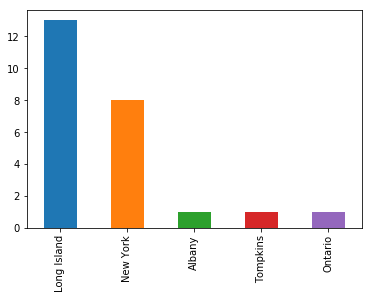

In [11]:
#Where in New York are birds released?
df[df.AreaName1.str.contains("New York", na=False)].AreaName2.value_counts().plot(kind='bar')


In [12]:
df.MappingDate.describe()

count    17383.000000
mean      1957.048898
std         61.902269
min        799.000000
25%       1931.000000
50%       1980.000000
75%       1997.000000
max       2014.000000
Name: MappingDate, dtype: float64

In [13]:
df.IntroducedDateGrouped.describe()

count    13163.000000
mean      1912.426347
std         78.531281
min        500.000000
25%       1872.500000
50%       1924.000000
75%       1967.000000
max       2010.000000
Name: IntroducedDateGrouped, dtype: float64

In [14]:
df.IntroducedDateGrouped.value_counts().head(10)

1965.0    314
1890.0    237
1985.0    237
1865.0    222
1870.0    203
1928.0    200
1862.0    199
1900.0    191
1975.0    191
1969.0    181
Name: IntroducedDateGrouped, dtype: int64

In [15]:
df.IntroducedDateGrouped.value_counts().tail(10)

1642.0    1
1777.0    1
1290.0    1
1414.0    1
1720.0    1
1705.0    1
1809.0    1
799.0     1
1493.0    1
1640.0    1
Name: IntroducedDateGrouped, dtype: int64

In [16]:
count = df.IntroducedDateGrouped.value_counts()

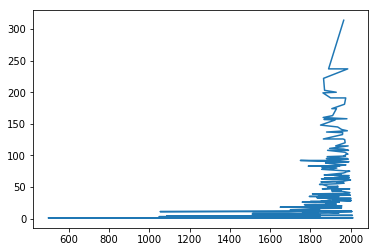

In [17]:
df.IntroducedDateGrouped.value_counts().plot()

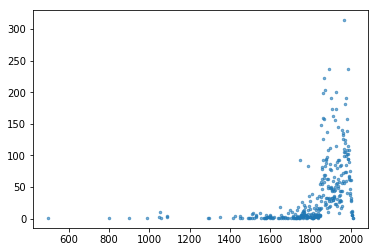

In [18]:
df.IntroducedDateGrouped.value_counts().plot(marker='o', linestyle='', alpha=0.6,markersize=2.5)

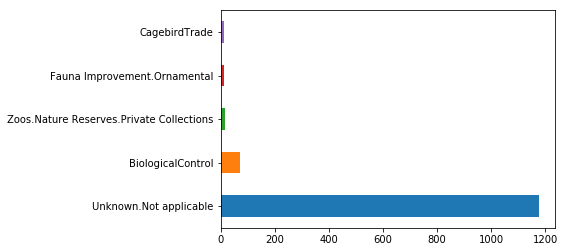

In [19]:
df[df.CommonName == 'House Sparrow'].IntroPurpose.value_counts().plot(kind='barh')

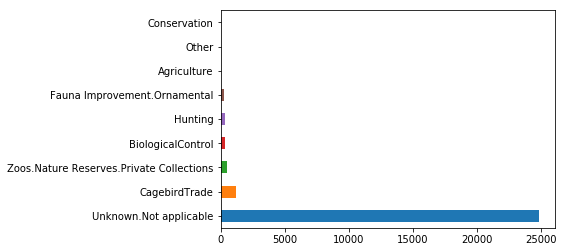

In [20]:
df.IntroPurpose.value_counts().plot(kind='barh', x=['Conservation', 'Other', 'Agriculture', 'Fauna Improvement.Ornamental', 'BiologicalControl', 'Zoos.Nature Reserves.Private Collections', 'CagebirdTrade'])

QUESTION: I'm trying to drop Unknown.Not applicable by excluding it from the list of X-values but it's not working! What am I doing wrong?

In [21]:
df.groupby('CommonName').IntroducedDateGrouped.mean()

CommonName
Abdim's Stork                   1999.000000
Abyssinian Ground-hornbill      1991.000000
African Collared-dove           1918.250000
African Firefinch               1956.333333
African Golden Weaver                   NaN
African Grey Hornbill           1999.000000
African Penguin                         NaN
African Sacred Ibis             1985.296296
African Silverbill              1959.000000
African Spoonbill               1993.333333
Alexandrine Parakeet            1988.882353
Allen's Gallinule                       NaN
American Black Duck             1975.000000
American Coot                   1891.000000
American Crow                   1838.000000
American Flamingo               1953.166667
American Goldfinch              1892.333333
American Kestrel                        NaN
American Robin                  1910.000000
American Swallow-tailed Kite            NaN
American White Pelican          1981.000000
American Woodcock                       NaN
Antipodes Parakeet   

In [22]:
df.groupby('CommonName').IntroducedDateGrouped.mean().sort_values().head()

CommonName
Tufted Jay                   900.000000
Rufous-vented Chachalaca    1690.000000
Bronze Munia                1766.727273
Red Shining-parrot          1782.818182
Black-billed Magpie         1785.750000
Name: IntroducedDateGrouped, dtype: float64

In [23]:
df.groupby('CommonName').IntroducedDateGrouped.mean().sort_values(ascending=False).head()

CommonName
Great-tailed Grackle    2010.0
Northern Bald Ibis      2004.0
Water Rail              2002.0
Little Crake            2002.0
Radjah Shelduck         2002.0
Name: IntroducedDateGrouped, dtype: float64

In [24]:
df.groupby('CommonName').IntroducedDateGrouped.value_counts(normalize=True)

CommonName                  IntroducedDateGrouped
Abdim's Stork               1999.0                   1.000000
Abyssinian Ground-hornbill  1991.0                   1.000000
African Collared-dove       1862.0                   0.500000
                            1963.0                   0.250000
                            1986.0                   0.250000
African Firefinch           1945.0                   0.333333
                            1960.0                   0.333333
                            1964.0                   0.333333
African Grey Hornbill       1999.0                   1.000000
African Sacred Ibis         1983.0                   0.123457
                            1975.0                   0.111111
                            1981.0                   0.111111
                            1995.0                   0.111111
                            1979.0                   0.061728
                            1992.0                   0.061728
                    

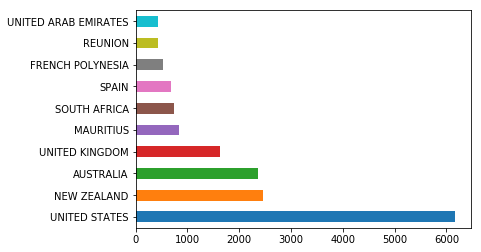

In [25]:
df.CountryName.value_counts().head(10).plot(kind='barh')

In [26]:
df.Notes.value_counts()

"Reported".                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              281
"Not established".                                                                                                                                                                                                                                                                                                                                                                         

In [27]:
df_sparrow = df[df.CommonName == 'House Sparrow']

In [28]:
df_sparrow.groupby('CountryName').IntroducedDateGrouped.mean().round().sort_values()

CountryName
REUNION                           1845.0
CUBA                              1856.0
MAURITIUS                         1868.0
BERMUDA                           1871.0
UNITED STATES                     1875.0
COMOROS                           1879.0
ARGENTINA                         1880.0
BAHAMAS                           1882.0
INDIA                             1882.0
GREENLAND                         1882.0
AUSTRALIA                         1883.0
CANADA                            1884.0
LESOTHO                           1885.0
INDONESIA                         1886.0
NEW ZEALAND                       1890.0
SWAZILAND                         1890.0
URUGUAY                           1890.0
SOUTH AFRICA                      1895.0
NEW CALEDONIA                     1899.0
TANZANIA, UNITED REPUBLIC OF      1900.0
BRITISH INDIAN OCEAN TERRITORY    1904.0
BRAZIL                            1906.0
JAMAICA                           1913.0
MEXICO                            1917.0
FALK

In [29]:
df_sparrow.CountryName.value_counts().head()

UNITED STATES    164
AUSTRALIA        150
NEW ZEALAND      111
SOUTH AFRICA      93
MAURITIUS         38
Name: CountryName, dtype: int64

In [30]:
df_sparrow.IntroPurpose.value_counts()

Unknown.Not applicable                      1179
BiologicalControl                             71
Zoos.Nature Reserves.Private Collections      16
Fauna Improvement.Ornamental                  14
CagebirdTrade                                 12
Name: IntroPurpose, dtype: int64

In [31]:
df_ibis = df[df.CommonName == 'African Sacred Ibis']

In [32]:
df_ibis.Notes

5653                                                                                                                                                                                                                                                                                                                                                                                                         Scarce: 100 - 10,000 breeding pairs
5819                                                                                                                                                                                                                                                                                                                                       Escaped from free-flying birds at Jurong Bird Park. Nesting in JBP but also regularly seen elsewhere.
6183                                                                                                                                  

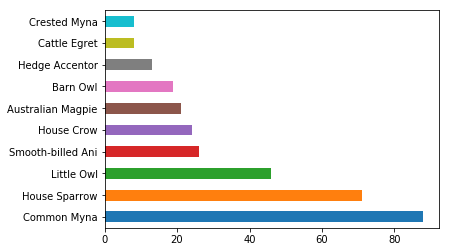

In [33]:
df[df.IntroPurpose.str.contains('BiologicalControl')].CommonName.value_counts().head(10).plot(kind='barh')

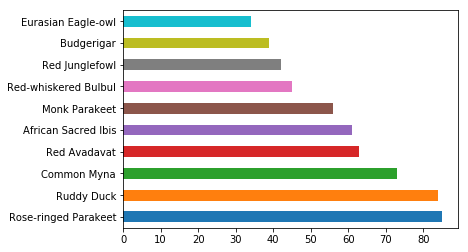

In [34]:
df_escaped = df[df.IntroMethod.str.contains("Escape", na=False)]
df_escaped.CommonName.value_counts().head(10).plot(kind='barh')

In [35]:
df_escaped.IntroPurpose.value_counts()

Unknown.Not applicable                      1267
CagebirdTrade                                604
Zoos.Nature Reserves.Private Collections     365
Agriculture                                   59
Hunting                                       12
Fauna Improvement.Ornamental                  11
BiologicalControl                              6
Other                                          6
Name: IntroPurpose, dtype: int64

In [36]:
#Getting a datafram of just the birds being introduced to a place for the first time
df2 = df[df.CPrecord == True]

In [37]:
df2.head()

,RecordID,SpeciesID,Order,Family,Genus,Species,Binomial,CommonName,CountryName,AreaName1,AreaName2,LocationDescription,Realm,Island,LandType,CPrecord,IntroducedDate,IntroducedDateGrouped,MappingDate,ReferenceDate,StatusCat,IntroMethod,IntroPurpose,TaxonomicNotes,Notes,RangeMap,Reference,CompilerInitial
3,4,1439,Psittaciformes,Psittacidae,Melopsittacus,undulatus,Melopsittacus undulatus,Budgerigar,UNITED STATES,Florida,Pinellas,St. Petersburg Area,Nearctic,False,Mainland,True,1950,1950.0,1950.0,NaN,Established,Unknown,Unknown.Not applicable,NaN,NaN,Mapped,"{Juniper, 1998 #209}",MP
19,21,1419,Psittaciformes,Psittacidae,Platycercus,eximius,Platycercus eximius,Eastern Rosella,NEW ZEALAND,Canterbury,NaN,Banks Peninsula,Australasian,True,Oceanic.Island,True,NaN,NaN,1998.0,NaN,Established,Unknown,Unknown.Not applicable,NaN,NaN,Mapped,"{Juniper, 1998 #209}",MP
56,65,1552,Psittaciformes,Psittacidae,Myiopsitta,monachus,Myiopsitta monachus,Monk Parakeet,BRAZIL,Rio de Janeiro,Rio de Janeiro,NaN,Neotropical,False,Mainland,True,NaN,NaN,1998.0,NaN,Established,Unknown,Unknown.Not applicable,NaN,NaN,Mapped,"{Juniper, 1998 #209}",MP
57,66,1552,Psittaciformes,Psittacidae,Myiopsitta,monachus,Myiopsitta monachus,Monk Parakeet,GERMANY,Berlin,Berlin,NaN,Palearctic,False,Mainland,True,NaN,NaN,1998.0,NaN,Established,Unknown,Unknown.Not applicable,NaN,NaN,Mapped,"{Juniper, 1998 #209}",MP
70,79,1566,Psittaciformes,Psittacidae,Brotogeris,versicolurus,Brotogeris versicolurus,White-winged Parakeet,ARGENTINA,Buenos Aires,NaN,NaN,Neotropical,False,Mainland,True,NaN,NaN,1998.0,NaN,Established,Unknown,Unknown.Not applicable,NaN,NaN,Mapped,"{Juniper, 1998 #209}",MP


In [38]:
df2.CommonName.value_counts().head(10)

Red Junglefowl         110
Common Myna            108
Common Pheasant        103
House Sparrow          100
Eurasian Skylark        79
California Quail        74
Helmeted Guineafowl     74
Northern Bobwhite       71
Indian Peafowl          69
Red Avadavat            66
Name: CommonName, dtype: int64

In [39]:
df2.IntroducedDateGrouped.value_counts().head(10)

1985.0    85
1965.0    84
1928.0    65
1960.0    61
1865.0    59
1929.0    57
1922.0    56
1975.0    55
1900.0    51
1870.0    50
Name: IntroducedDateGrouped, dtype: int64

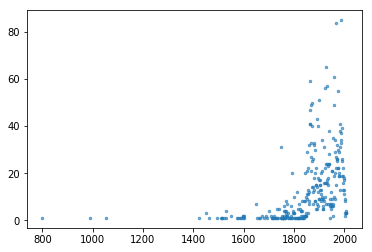

In [40]:
df2.IntroducedDateGrouped.value_counts().plot(marker='o', linestyle='', alpha=0.6,markersize=2.5)

In [41]:
df2.IntroPurpose.value_counts()

Unknown.Not applicable                      4700
CagebirdTrade                                350
Zoos.Nature Reserves.Private Collections     139
BiologicalControl                             90
Hunting                                       84
Fauna Improvement.Ornamental                  62
Agriculture                                   22
Other                                         16
Conservation                                  14
Name: IntroPurpose, dtype: int64

In [42]:
NY_birds = df[df.AreaName1.str.contains("New York", na=False)]

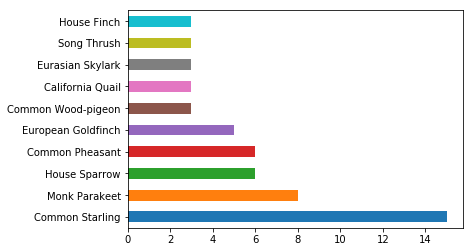

In [43]:
NY_birds.CommonName.value_counts().head(10).plot(kind='barh')

In [44]:
NY_birds.AreaName2.value_counts()

Long Island    13
New York        8
Albany          1
Tompkins        1
Ontario         1
Name: AreaName2, dtype: int64

In [45]:
NY_birds.LocationDescription.value_counts()

Brooklyn                                          6
Central Park                                      3
NY                                                2
Bronx Park                                        2
Various USA, only established on Long Island      1
NE states, within 100 miles of NY                 1
Brooklyn Park                                     1
Gardiners Island                                  1
Franklin, Dutchess, Delaware and West Counties    1
Name: LocationDescription, dtype: int64

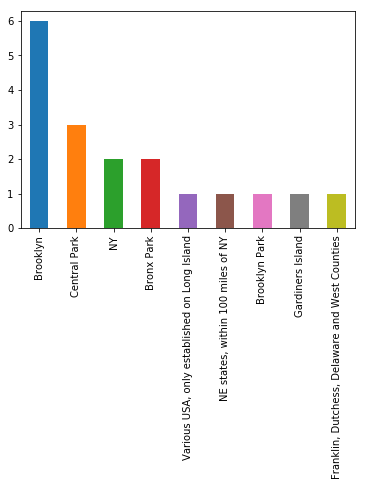

In [46]:
NY_birds.LocationDescription.value_counts().plot(kind='bar')

In [47]:
NY_birds

,RecordID,SpeciesID,Order,Family,Genus,Species,Binomial,CommonName,CountryName,AreaName1,AreaName2,LocationDescription,Realm,Island,LandType,CPrecord,IntroducedDate,IntroducedDateGrouped,MappingDate,ReferenceDate,StatusCat,IntroMethod,IntroPurpose,TaxonomicNotes,Notes,RangeMap,Reference,CompilerInitial
55,64,1552,Psittaciformes,Psittacidae,Myiopsitta,monachus,Myiopsitta monachus,Monk Parakeet,UNITED STATES,New York,NaN,NaN,Nearctic,False,Mainland,False,NaN,NaN,1998.0,NaN,Established,Unknown,Unknown.Not applicable,NaN,NaN,Mapped,"{Juniper, 1998 #209}",MP
738,868,295,Galliformes,Numididae,Numida,meleagris,Numida meleagris,Helmeted Guineafowl,UNITED STATES,New York,New York,NaN,Nearctic,False,Mainland,True,1886,1886.0,1886.0,NaN,Unsuccessful,Unknown,Unknown.Not applicable,NaN,NaN,Mapped,"{Long, 1981 #204}",MP
769,899,288,Galliformes,Phasianidae,Tympanuchus,phasianellus,Tympanuchus phasianellus,Sharp-tailed Grouse,UNITED STATES,New York,Albany,NaN,Nearctic,False,Mainland,True,1939,1939.0,1939.0,NaN,Unsuccessful,Unknown,Unknown.Not applicable,NaN,NaN,Mapped,"{Long, 1981 #204}",MP
770,900,288,Galliformes,Phasianidae,Tympanuchus,phasianellus,Tympanuchus phasianellus,Sharp-tailed Grouse,UNITED STATES,New York,Tompkins,NaN,Nearctic,False,Mainland,True,1939,1939.0,1939.0,NaN,Unsuccessful,Unknown,Unknown.Not applicable,NaN,NaN,Mapped,"{Long, 1981 #204}",MP
916,1046,259,Galliformes,Phasianidae,Syrmaticus,reevesii,Syrmaticus reevesii,Reeves's Pheasant,UNITED STATES,New York,NaN,NaN,Nearctic,False,Mainland,False,NaN,NaN,NaN,1937.0,Unknown,Unknown,Unknown.Not applicable,NaN,NaN,Not Mapped,"{Long, 1981 #204}",MP
976,1106,2362,Columbiformes,Columbidae,Columba,palumbus,Columba palumbus,Common Wood-pigeon,UNITED STATES,New York,New York,Bronx Park,Nearctic,False,Mainland,True,1910,1910.0,1910.0,NaN,Unsuccessful,Unknown,Unknown.Not applicable,NaN,NaN,Mapped,"{Long, 1981 #204}",MP
1053,1183,1442,Psittaciformes,Psittacidae,Strigops,habroptila,Strigops habroptila,Kakapo,UNITED STATES,New York,Long Island,NaN,Nearctic,True,Continental.Island,True,1894,1894.0,1894.0,NaN,Unsuccessful,Unknown,Unknown.Not applicable,NaN,NaN,Mapped,"{Long, 1981 #204}",MP
1079,1209,1526,Psittaciformes,Psittacidae,Nandayus,nenday,Nandayus nenday,Nanday Parakeet,UNITED STATES,New York,Ontario,NaN,Nearctic,False,Mainland,True,NaN,NaN,1974.0,1974.0,Established,Unknown,Unknown.Not applicable,NaN,NaN,Mapped,"{Long, 1981 #204}",MP
1083,1213,1569,Psittaciformes,Psittacidae,Brotogeris,jugularis,Brotogeris jugularis,Orange-chinned Parakeet,UNITED STATES,New York,New York,NaN,Nearctic,False,Mainland,True,NaN,NaN,1973.0,1973.0,Unknown,Unknown,Unknown.Not applicable,NaN,NaN,Mapped,"{Long, 1981 #204}",MP
1096,1226,1625,Psittaciformes,Psittacidae,Amazona,ochrocephala,Amazona ochrocephala,Yellow-crowned Amazon,UNITED STATES,New York,New York,NaN,Nearctic,False,Mainland,True,NaN,NaN,1973.0,1973.0,Unknown,Unknown,Unknown.Not applicable,NaN,NaN,Mapped,"{Long, 1981 #204}",MP


In [48]:
BK_birds = NY_birds[NY_birds.LocationDescription.str.contains("Brooklyn", na=False)]
BK_birds

,RecordID,SpeciesID,Order,Family,Genus,Species,Binomial,CommonName,CountryName,AreaName1,AreaName2,LocationDescription,Realm,Island,LandType,CPrecord,IntroducedDate,IntroducedDateGrouped,MappingDate,ReferenceDate,StatusCat,IntroMethod,IntroPurpose,TaxonomicNotes,Notes,RangeMap,Reference,CompilerInitial
8079,8389,8016,Passeriformes,Passeridae,Passer,domesticus,Passer domesticus,House Sparrow,UNITED STATES,New York,NaN,Brooklyn Park,Nearctic,False,Mainland,True,1850,1850.0,1850.0,NaN,Unsuccessful,Released,Unknown.Not applicable,NaN,"1850: 8 pairs released in Brooklyn Park, NY. All died before spring.",Mapped,"{Root, 1988 #395}",EJ
18844,19284,8459,Passeriformes,Fringillidae,Carduelis,carduelis,Carduelis carduelis,European Goldfinch,UNITED STATES,New York,NaN,Brooklyn,Nearctic,False,Mainland,True,1846,1846.0,1846.0,NaN,Unsuccessful,Released,Unknown.Not applicable,NaN,NaN,Mapped,"{Phillips, 1928 #801}",EJ
18845,19285,8462,Passeriformes,Fringillidae,Carduelis,cannabina,Carduelis cannabina,Eurasian Linnet,UNITED STATES,New York,NaN,Brooklyn,Nearctic,False,Mainland,True,1846,1846.0,1846.0,NaN,Unsuccessful,Released,Unknown.Not applicable,NaN,NaN,Mapped,"{Phillips, 1928 #801}",EJ
18846,19286,8511,Passeriformes,Fringillidae,Pyrrhula,pyrrhula,Pyrrhula pyrrhula,Eurasian Bullfinch,UNITED STATES,New York,NaN,Brooklyn,Nearctic,False,Mainland,True,1846,1846.0,1846.0,NaN,Unsuccessful,Released,Unknown.Not applicable,NaN,NaN,Mapped,"{Phillips, 1928 #801}",EJ
18847,19287,7831,Passeriformes,Alaudidae,Alauda,arvensis,Alauda arvensis,Eurasian Skylark,UNITED STATES,New York,NaN,Brooklyn,Nearctic,False,Mainland,True,1846,1846.0,1846.0,NaN,Unsuccessful,Released,Unknown.Not applicable,NaN,NaN,Mapped,"{Phillips, 1928 #801}",EJ
18848,19288,8016,Passeriformes,Passeridae,Passer,domesticus,Passer domesticus,House Sparrow,UNITED STATES,New York,NaN,Brooklyn,Nearctic,False,Mainland,False,1850-1853,1851.0,1851.0,NaN,Unknown,Released,Unknown.Not applicable,NaN,NaN,Mapped,"{Phillips, 1928 #801}",EJ
19999,20588,8016,Passeriformes,Passeridae,Passer,domesticus,Passer domesticus,House Sparrow,UNITED STATES,New York,NaN,Brooklyn,Nearctic,False,Mainland,True,1851,1851.0,1851.0,NaN,Unsuccessful,Released,Unknown.Not applicable,NaN,8 pairs released,Mapped,"{Gebhardt, 1959 #338}",EJ


In [49]:
NY_birds.groupby('CommonName').LocationDescription.value_counts()

CommonName          LocationDescription                           
California Quail    Gardiners Island                                  1
Common Starling     Central Park                                      1
Common Wood-pigeon  Bronx Park                                        2
Eurasian Bullfinch  Brooklyn                                          1
Eurasian Chaffinch  Central Park                                      1
Eurasian Linnet     Brooklyn                                          1
Eurasian Skylark    Brooklyn                                          1
European Goldfinch  Brooklyn                                          1
                    Various USA, only established on Long Island      1
House Finch         NY                                                1
House Sparrow       Brooklyn                                          2
                    Brooklyn Park                                     1
                    NY                                               

In [50]:
df_escaped.CPrecord.value_counts()

False    1714
True      616
Name: CPrecord, dtype: int64

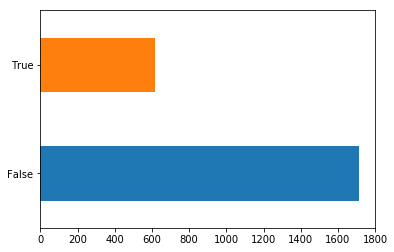

In [51]:
df_escaped.CPrecord.value_counts().plot(kind='barh', stacked=True)
#How could I get these to stack?

In [52]:
df_escaped.groupby('CommonName').LocationDescription.value_counts()

CommonName                     LocationDescription                                                                                                                                                                                    
African Sacred Ibis            Dubai; Abu Dhabi                                                                                                                                                                                           1
African Silverbill             'Arabian Gulf States'                                                                                                                                                                                      1
Alexandrine Parakeet           West Bank                                                                                                                                                                                                  1
American Black Duck            Durban                        

In [53]:
df_escaped.groupby('AreaName1').CommonName.value_counts()

AreaName1                     CommonName                
Abu Dhabi                     Chukar                        11
                              Black Francolin                6
                              Mute Swan                      4
                              Black-necked Swan              3
                              Trumpeter Swan                 2
                              Yellow-necked Spurfowl         2
                              Arabian Partridge              1
                              Egyptian Goose                 1
                              Ostrich                        1
                              Red-crested Pochard            1
                              See-see Partridge              1
Andaman & nicobar             Common Myna                    1
                              Red Junglefowl                 1
                              Red-whiskered Bulbul           1
Arizona                       Golden-backed Bishop           

In [54]:
df2.groupby('AreaName1').CommonName.value_counts()

AreaName1          CommonName              
'Eua               Red Junglefowl              2
                   Red Shining-parrot          2
                   Common Myna                 1
Aberdeen           Rufous-shafted Woodstar     1
Aberdeenshire      Rock Partridge              1
Abu Dhabi          Chukar                      3
                   Black Francolin             2
                   Mute Swan                   2
                   Arabian Partridge           1
                   Bank Myna                   1
                   Black-necked Swan           1
                   Ostrich                     1
                   See-see Partridge           1
                   Sulphur-crested Cockatoo    1
                   Trumpeter Swan              1
                   Yellow-necked Spurfowl      1
Aceh               Sooty-headed Bulbul         1
Aden               House Crow                  1
Agadez             African Silverbill          1
Agalega Islands    Common

In [55]:
monk = df[df.CommonName.str.contains("Monk", na=False)]

In [56]:
monk.CountryName.value_counts()

UNITED STATES             124
UNITED KINGDOM             69
SPAIN                      46
PUERTO RICO                19
ITALY                      17
CAYMAN ISLANDS             13
BELGIUM                    11
CZECH REPUBLIC             11
MEXICO                      6
GERMANY                     6
GUADELOUPE                  6
NETHERLANDS                 5
CANADA                      5
JAPAN                       4
AUSTRIA                     4
VIRGIN ISLANDS, U.S         4
ISRAEL                      4
BAHAMAS                     4
FRANCE                      3
CHILE                       3
VENEZUELA                   3
BRAZIL                      3
PORTUGAL                    3
UNITED ARAB EMIRATES        2
KENYA                       2
MALTA                       1
AUSTRALIA                   1
DOMINICAN REPUBLIC          1
BERMUDA                     1
SLOVAKIA                    1
BRITISH VIRGIN ISLANDS      1
DENMARK                     1
Name: CountryName, dtype: int64

In [57]:
monk.CPrecord.value_counts()

False    334
True      52
Name: CPrecord, dtype: int64

In [58]:
monk.sort_values(by='IntroducedDateGrouped')

,RecordID,SpeciesID,Order,Family,Genus,Species,Binomial,CommonName,CountryName,AreaName1,AreaName2,LocationDescription,Realm,Island,LandType,CPrecord,IntroducedDate,IntroducedDateGrouped,MappingDate,ReferenceDate,StatusCat,IntroMethod,IntroPurpose,TaxonomicNotes,Notes,RangeMap,Reference,CompilerInitial
17250,17623,1552,Psittaciformes,Psittacidae,Myiopsitta,monachus,Myiopsitta monachus,Monk Parakeet,GERMANY,NaN,NaN,NaN,Palearctic,False,Mainland,False,1892,1892.0,NaN,NaN,Established,Unknown,Unknown.Not applicable,NaN,1996: locally est.,Not Mapped,"{Gebhardt, 1996 #362}",FD
6871,7169,1552,Psittaciformes,Psittacidae,Myiopsitta,monachus,Myiopsitta monachus,Monk Parakeet,GERMANY,NaN,NaN,NaN,Palearctic,False,Mainland,False,1892,1892.0,NaN,NaN,Unknown,Unknown,Unknown.Not applicable,NaN,NaN,Not Mapped,"{Lever, 2005 #385}",ED
27107,27940,1552,Psittaciformes,Psittacidae,Myiopsitta,monachus,Myiopsitta monachus,Monk Parakeet,ITALY,NaN,NaN,NaN,Palearctic,False,Mainland,False,1936,1936.0,1948.0,NaN,Unknown,Unknown,Unknown.Not applicable,NaN,1936-48: bred Milan,Mapped,"{Snow, 1998 #392}",FD
27609,28482,1552,Psittaciformes,Psittacidae,Myiopsitta,monachus,Myiopsitta monachus,Monk Parakeet,ITALY,Sicily,NaN,NaN,Palearctic,True,Continental.Island,False,1936,1936.0,1985.0,NaN,Unknown,Unknown,Unknown.Not applicable,NaN,1936-48: bred Milan\nMid-1980s: few tens of pairs breeding,Mapped,"{Snow, 1998 #392}",FD
8145,8455,1552,Psittaciformes,Psittacidae,Myiopsitta,monachus,Myiopsitta monachus,Monk Parakeet,ITALY,NaN,NaN,NaN,Palearctic,False,Mainland,True,1936,1936.0,1936.0,NaN,Unknown,Unknown,Unknown.Not applicable,NaN,1936-48: bred Milan,Mapped,"{Snow, 1998 #392}",FD
27111,27945,1552,Psittaciformes,Psittacidae,Myiopsitta,monachus,Myiopsitta monachus,Monk Parakeet,ITALY,NaN,NaN,NaN,Palearctic,False,Mainland,False,1936,1936.0,1985.0,NaN,Unknown,Unknown,Unknown.Not applicable,NaN,1936-48: bred Milan\nMid-1980s: few tens of pairs breeding,Mapped,"{Snow, 1998 #392}",FD
6883,7181,1552,Psittaciformes,Psittacidae,Myiopsitta,monachus,Myiopsitta monachus,Monk Parakeet,PUERTO RICO,NaN,NaN,NaN,Neotropical,True,Oceanic.Island,False,1950s,1955.0,NaN,NaN,Established,Unknown,Unknown.Not applicable,NaN,NaN,Not Mapped,"{Lever, 2005 #385}",ED
18392,18828,1552,Psittaciformes,Psittacidae,Myiopsitta,monachus,Myiopsitta monachus,Monk Parakeet,UNITED STATES,NaN,NaN,NaN,Nearctic,False,Mainland,False,1960s,1965.0,1965.0,NaN,Established,Unknown,CagebirdTrade,NaN,Free-ranging individuals reported from the 1960s.\n1969: first documented nesting in Florida,Mapped,"{Johnson, 2009 #864}",EJ
27097,27929,1552,Psittaciformes,Psittacidae,Myiopsitta,monachus,Myiopsitta monachus,Monk Parakeet,UNITED STATES,NaN,NaN,"NY, FL, MI, OH, OK, NC, ND, NE, TX, CT, NJ, PA, MA, AL,WI, ME, LA, MS, GA, IL, SC, VA, MD, DE, RI, NH, CA, OR, ID, KY",Nearctic,False,Mainland,False,<1967,1966.0,1970.0,NaN,Established,Unknown,CagebirdTrade,NaN,"1967: recorded NY\n1969: breeding FL\nlate 1960s/early 1970s: recorded CT, NJ, PA, MA\n1970: breeding NY",Mapped,"{Lever, 2005 #385}",ED
27096,27928,1552,Psittaciformes,Psittacidae,Myiopsitta,monachus,Myiopsitta monachus,Monk Parakeet,UNITED STATES,NaN,NaN,"NY, FL, MI, OH, OK, NC, ND, NE, TX, CT, NJ, PA, MA, AL,WI, ME, LA, MS, GA, IL, SC, VA, MD, DE, RI, NH, CA, OR, ID, KY",Nearctic,False,Mainland,False,<1967,1966.0,1969.0,NaN,Established,Unknown,CagebirdTrade,NaN,1967: recorded NY\n1969: breeding FL,Mapped,"{Lever, 2005 #385}",ED


In [59]:
monk.StatusCat.value_counts()

Established     157
Unknown         117
Breeding         77
Unsuccessful     23
DiedOut           7
Extirpated        5
Name: StatusCat, dtype: int64

#A fun inquiry would be to find out the most vigorous/successful species, the ones with the greatest Established number....

In [60]:
monk.IntroMethod.value_counts()

Unknown                       328
Escaped                        56
Colonised.from.introd.popn      1
Released                        1
Name: IntroMethod, dtype: int64

In [61]:
monk.IntroPurpose.value_counts()

Unknown.Not applicable                      324
CagebirdTrade                                54
Zoos.Nature Reserves.Private Collections      8
Name: IntroPurpose, dtype: int64

In [62]:
monk.Notes.value_counts()

Recorded                                                                                                                                                                                                                                                                                                                                                                                                                            18
1973: c.4,000-5,000 birds present in USA; eradication programme initiated                                                                                                                                                                                                                                                                                                                                                            6
"Est and expanding".                                                                                                                                      

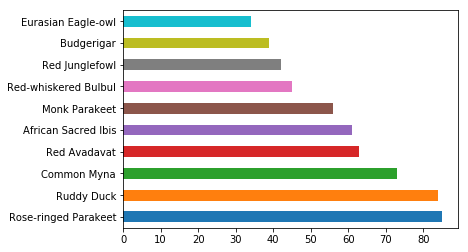

In [63]:
df_escaped.CommonName.value_counts().head(10).plot(kind='barh')

In [64]:
df_escaped.IntroMethod.value_counts()

Escaped    2330
Name: IntroMethod, dtype: int64

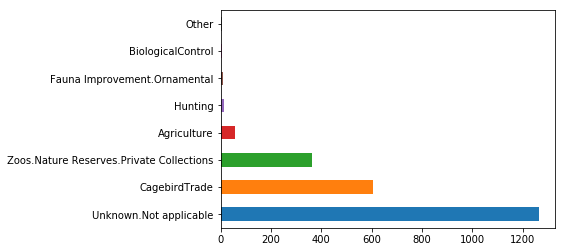

In [65]:
df_escaped.IntroPurpose.value_counts().plot(kind='barh')

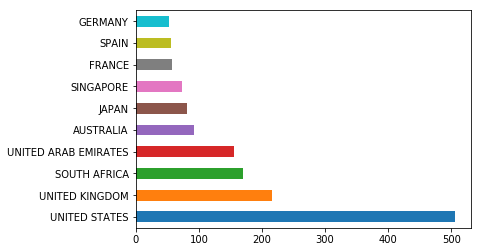

In [66]:
df_escaped.CountryName.value_counts().head(10).plot(kind='barh')

In [67]:
df_escaped.Notes.value_counts()

"Reported".                                                                                                                                                                                                                                                                                                                                                        39
Breeding                                                                                                                                                                                                                                                                                                                                                           32
MP - Escapee                                                                                                                                                                                                                                                                                

In [68]:
df_escaped.StatusCat.value_counts()

Unknown         1230
Established      632
Breeding         302
Unsuccessful     116
DiedOut           38
Extirpated        12
Name: StatusCat, dtype: int64

In [69]:
df_escaped.groupby('StatusCat').CommonName.value_counts()

StatusCat     CommonName                  
Breeding      Eurasian Eagle-owl              32
              Black-bellied Whistling-duck    22
              Monk Parakeet                   15
              Chilean Flamingo                12
              Common Myna                     11
              Rose-ringed Parakeet             9
              Ruddy Shelduck                   9
              Streaked Weaver                  9
              Snow Goose                       8
              Bank Myna                        6
              Greater Flamingo                 6
              Mandarin Duck                    6
              Red-vented Bulbul                6
              African Sacred Ibis              5
              Greater White-fronted Goose      5
              Lilac-crowned Amazon             5
              Muscovy Duck                     5
              Red Avadavat                     5
              Red-masked Parakeet              5
              Superb Starl

In [70]:
successful_escapes = df_escaped[df_escaped.StatusCat.str.contains("(Established|Breeding)", na=False)]

/Users/jessicasmckenzie/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


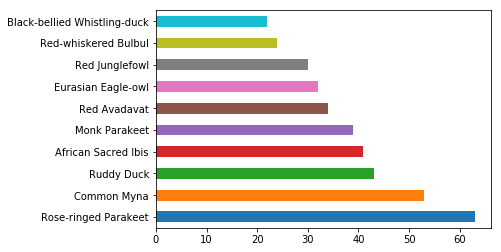

In [71]:
successful_escapes.CommonName.value_counts().head(10).plot(kind='barh')

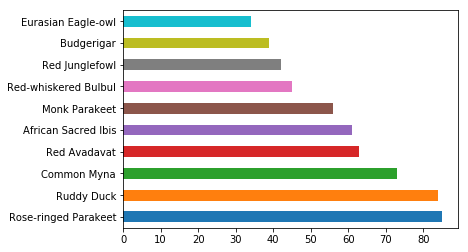

In [72]:
df_escaped.CommonName.value_counts().head(10).plot(kind='barh')

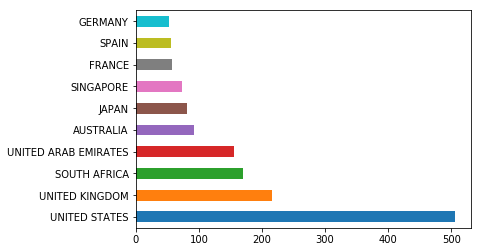

In [73]:
df_escaped.CountryName.value_counts().head(10).plot(kind='barh')

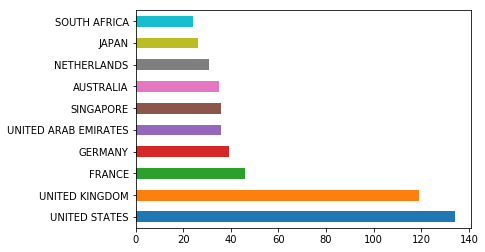

In [74]:
successful_escapes.CountryName.value_counts().head(10).plot(kind='barh')

In [75]:
US_birds = df[df.CountryName.str.contains('UNITED STATES', na=False)]

In [76]:
US_birds.CommonName.value_counts()

Common Pheasant             186
House Sparrow               164
Common Starling             160
Monk Parakeet               124
Common Myna                 122
House Finch                 122
Rose-ringed Parakeet        107
Eurasian Skylark            105
Java Sparrow                 90
Red-crowned Amazon           86
Budgerigar                   86
Eurasian Collared-dove       85
Spotted Dove                 79
Northern Cardinal            76
Grey Partridge               75
Japanese White-eye           75
Red-crested Cardinal         74
Scaly-breasted Munia         71
Red-billed Leiothrix         70
Red-whiskered Bulbul         69
White-winged Parakeet        68
Nanday Parakeet              64
Northern Mockingbird         63
Chinese Hwamei               63
Chukar                       63
Rock Pigeon                  62
Spot-breasted Oriole         59
Hill Myna                    57
California Quail             55
Eurasian Tree Sparrow        54
                           ... 
African 

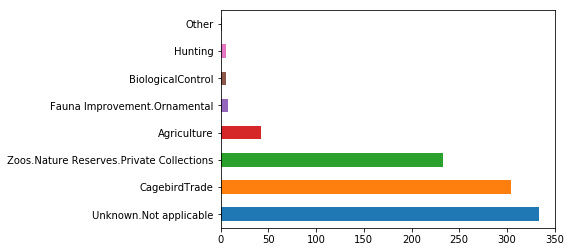

In [77]:
successful_escapes.IntroPurpose.value_counts().plot(kind='barh')

In [78]:
unsuccessful_escapes = df_escaped[df_escaped.StatusCat.str.contains("(Unsuccessful|DiedOut|Extirpated)", na=False)]

/Users/jessicasmckenzie/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


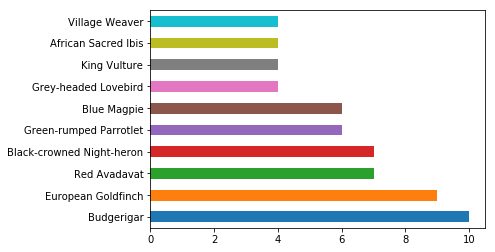

In [79]:
unsuccessful_escapes.CommonName.value_counts().head(10).plot(kind='barh')

In [80]:
unsuccessful_escapes.Notes.value_counts()

2000: popn. probably extinct                                                                                                                                                                                                                                                                                                                                                                                                              10
Isolated records                                                                                                                                                                                                                                                                                                                                                                                                                           4
1755: v. common\n1916: common\n1950 sp. announced as extinct                                                                                  

Refining some of these graphs

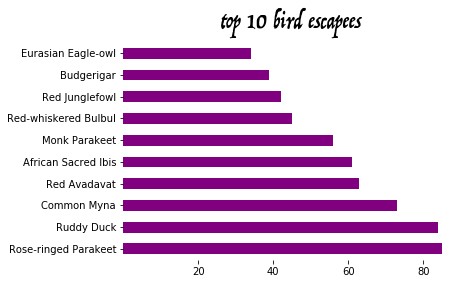

In [81]:
ax = df_escaped.CommonName.value_counts().head(10).plot(kind='barh', color='purple')
ax.set_title("top 10 bird escapees", pad=15)
ax.title.set_fontsize("22")
ax.title.set_fontname("Trattatello")
ax.set_xticks([20,40,60,80])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

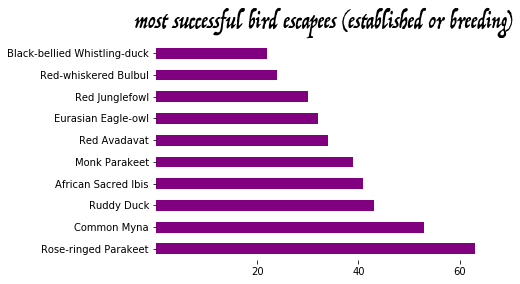

In [82]:
ax = successful_escapes.CommonName.value_counts().head(10).plot(kind='barh', color='purple')
ax.set_title("most successful bird escapees (established or breeding)", pad=15)
ax.title.set_fontsize("22")
ax.title.set_fontname("Trattatello")
ax.set_xticks([20,40,60])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

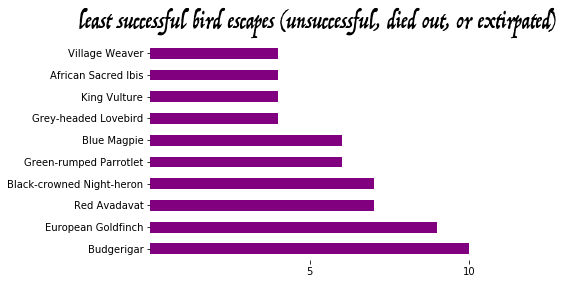

In [83]:
ax = unsuccessful_escapes.CommonName.value_counts().head(10).plot(kind='barh', color='purple')
ax.set_title("least successful bird escapes (unsuccessful, died out, or extirpated)", pad=15)
ax.title.set_fontsize("22")
ax.title.set_fontname("Trattatello")
ax.set_xticks([5,10])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

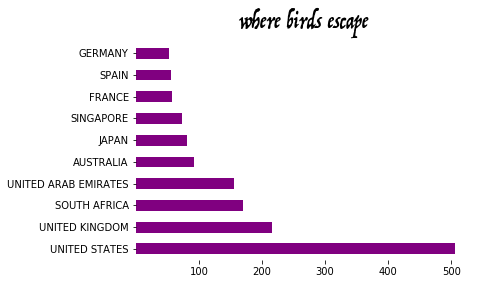

In [84]:
ax = df_escaped.CountryName.value_counts().head(10).plot(kind='barh', color='purple')
ax.set_title("where birds escape", pad=15)
ax.title.set_fontsize("22")
ax.title.set_fontname("Trattatello")
ax.set_xticks([100,200,300,400,500])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

In [85]:
df.head()

,RecordID,SpeciesID,Order,Family,Genus,Species,Binomial,CommonName,CountryName,AreaName1,AreaName2,LocationDescription,Realm,Island,LandType,CPrecord,IntroducedDate,IntroducedDateGrouped,MappingDate,ReferenceDate,StatusCat,IntroMethod,IntroPurpose,TaxonomicNotes,Notes,RangeMap,Reference,CompilerInitial
0,1,1439,Psittaciformes,Psittacidae,Melopsittacus,undulatus,Melopsittacus undulatus,Budgerigar,OMAN,NaN,NaN,NaN,Afrotropical,False,Mainland,False,NaN,NaN,NaN,NaN,Unsuccessful,Unknown,Unknown.Not applicable,NaN,NaN,Not Mapped,"{Juniper, 1998 #209}",MP
1,2,1439,Psittaciformes,Psittacidae,Melopsittacus,undulatus,Melopsittacus undulatus,Budgerigar,UNITED STATES,Hawaiian Islands,Hawai'i,NaN,Oceanic,True,Oceanic.Island,False,NaN,NaN,1998.0,NaN,Unsuccessful,Unknown,Unknown.Not applicable,NaN,NaN,Mapped,"{Juniper, 1998 #209}",MP
2,3,1439,Psittaciformes,Psittacidae,Melopsittacus,undulatus,Melopsittacus undulatus,Budgerigar,UNITED STATES,California,NaN,NaN,Nearctic,False,Mainland,False,NaN,NaN,NaN,NaN,Unsuccessful,Unknown,Unknown.Not applicable,NaN,NaN,Not Mapped,"{Juniper, 1998 #209}",MP
3,4,1439,Psittaciformes,Psittacidae,Melopsittacus,undulatus,Melopsittacus undulatus,Budgerigar,UNITED STATES,Florida,Pinellas,St. Petersburg Area,Nearctic,False,Mainland,True,1950,1950.0,1950.0,NaN,Established,Unknown,Unknown.Not applicable,NaN,NaN,Mapped,"{Juniper, 1998 #209}",MP
4,5,1439,Psittaciformes,Psittacidae,Melopsittacus,undulatus,Melopsittacus undulatus,Budgerigar,UNITED STATES,Florida,NaN,Jacksonville to Miami,Nearctic,False,Mainland,False,NaN,NaN,1998.0,NaN,Established,Unknown,Unknown.Not applicable,NaN,NaN,Mapped,"{Juniper, 1998 #209}",MP


In [86]:
df.pivot_table(index="CommonName", columns='StatusCat')

CPrecord                                                         IntroducedDateGrouped                                                                Island                                                        MappingDate                                                                 RecordID                                                                       ReferenceDate                                                           SpeciesID                                                    
StatusCat                     Breeding   DiedOut Established Extirpated   Unknown Unsuccessful              Breeding DiedOut  Established   Extirpated      Unknown Unsuccessful  Breeding DiedOut Established Extirpated   Unknown Unsuccessful     Breeding  DiedOut  Established Extirpated      Unknown Unsuccessful      Breeding       DiedOut   Established    Extirpated       Unknown  Unsuccessful      Breeding DiedOut  Established Extirpated      Unknown Unsuccessful  Breeding DiedOut Established Extirpated Unknown Unsuccessful
CommonName                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
Abdim's Stork                      NaN       NaN         NaN        NaN  1.000000          NaN                   NaN     NaN          NaN          NaN  1999.000000          NaN       NaN     NaN         NaN        NaN  0.000000          NaN          NaN      NaN          NaN        NaN  1999.000000          NaN           NaN           NaN           NaN           NaN  19706.000000           NaN           NaN     NaN          NaN        NaN          NaN          NaN       NaN     NaN         NaN        NaN  3697.0          NaN
Abyssinian Ground-hornbill         NaN       NaN         NaN        NaN  0.000000     1.000000                   NaN     NaN          NaN          NaN  1991.000000  1991.000000       NaN     NaN         NaN        NaN  0.000000     0.000000          NaN      NaN          NaN        NaN          NaN  1991.000000           NaN           NaN           NaN           NaN  15243.500000  16726.000000           NaN     NaN          NaN        NaN          NaN          NaN       NaN     NaN         NaN        NaN   946.0        946.0
African Collared-dove         0.142857       NaN    0.444444        NaN  0.235294     0.500000                   NaN     NaN          NaN          NaN  1918.250000          NaN  1.000000     NaN    0.611111        NaN  0.529412     0.000000  2004.857143      NaN  2005.272727        NaN  1985.000000  2005.000000  11451.714286           NaN  10141.111111           NaN  15829.764706   5672.000000        1998.0     NaN  2004.000000        NaN          NaN       2006.0    2420.0     NaN      2420.0        NaN  2420.0       2420.0
African Firefinch                  NaN       NaN         NaN        NaN       NaN     0.333333                   NaN     NaN          NaN          NaN          NaN  1956.333333       NaN     NaN         NaN        NaN       NaN     0.333333          NaN      NaN          NaN        NaN          NaN  1964.500000           NaN           NaN           NaN           NaN           NaN   6645.333333           NaN     NaN          NaN        NaN          NaN          NaN       NaN     NaN         NaN        NaN     NaN       8270.0
African Golden Weaver              NaN       NaN         NaN        NaN  0.000000          NaN                   NaN     NaN          NaN          NaN          NaN          NaN       NaN     NaN         NaN        NaN  0.000000          NaN          NaN      NaN          NaN        NaN          NaN          NaN 

In [87]:
escaped_status = df_escaped.groupby("CommonName").StatusCat.value_counts().unstack().reset_index().fillna(0)#.head().plot(kind='barh', stacked=True)
escaped_status.head()

StatusCat,CommonName,Breeding,DiedOut,Established,Extirpated,Unknown,Unsuccessful
0,African Collared-dove,0.0,0.0,0.0,0.0,2.0,0.0
1,African Firefinch,0.0,0.0,0.0,0.0,0.0,1.0
2,African Sacred Ibis,5.0,0.0,36.0,3.0,16.0,1.0
3,African Silverbill,0.0,0.0,0.0,0.0,2.0,0.0
4,African Spoonbill,1.0,0.0,0.0,0.0,0.0,0.0


In [88]:
escaped_status['total_escaped'] = escaped_status.sum(axis=1)

In [89]:
escaped_status.sort_values(by='total_escaped', ascending=False).head(15)

StatusCat,CommonName,Breeding,DiedOut,Established,Extirpated,Unknown,Unsuccessful,total_escaped
310,Rose-ringed Parakeet,9.0,0.0,54.0,0.0,21.0,1.0,85.0
314,Ruddy Duck,0.0,0.0,43.0,0.0,41.0,0.0,84.0
92,Common Myna,11.0,0.0,42.0,1.0,19.0,0.0,73.0
273,Red Avadavat,5.0,4.0,29.0,0.0,22.0,3.0,63.0
2,African Sacred Ibis,5.0,0.0,36.0,3.0,16.0,1.0,61.0
233,Monk Parakeet,15.0,0.0,24.0,1.0,16.0,0.0,56.0
301,Red-whiskered Bulbul,1.0,0.0,23.0,0.0,21.0,0.0,45.0
276,Red Junglefowl,0.0,3.0,30.0,0.0,9.0,0.0,42.0
68,Budgerigar,4.0,0.0,4.0,0.0,21.0,10.0,39.0
123,Eurasian Eagle-owl,32.0,0.0,0.0,0.0,2.0,0.0,34.0


In [90]:
plt.rcdefaults()
plt.rcParams.update({
    'lines.linewidth': 3,
    'legend.frameon' : False,
    'legend.borderaxespad' : 0,
    'axes.prop_cycle': cycler('color', ['#373F27', '#636B46', '#CDA34F', '#AF473C', '#945D60', '#E9E7DA']),
    'axes.facecolor': '#f7f7f7',
    'axes.labelcolor' : 'black',
    'axes.labelsize': 'large',
    'axes.axisbelow': True,
#     'axes.grid': True,
    'axes.edgecolor': '#f7f7f7',
    'axes.titlepad' : 20,
    'axes.labelpad' : 5,
    'patch.edgecolor': '#f7f7f7',
    'patch.linewidth': 0,
#     'grid.linestyle': '-',
#     'grid.linewidth': 2,
#     'grid.color': 'white',
    'xtick.major.size': 10,
    'xtick.minor.size': 0,
    'ytick.major.size': 10,
    'ytick.minor.size': 0,
    'xtick.color' : 'black', 
    'ytick.color' : 'black',
    'font.size': 14.0,
    'font.serif' : 'Times New Roman',
    'font.family' : 'serif',
    'savefig.bbox' : 'tight',
    'savefig.edgecolor': '#f7f7f7',
    'savefig.facecolor': '#f7f7f7',
    'figure.subplot.left': 0.08,
    'figure.subplot.right': 0.95,
    'figure.subplot.bottom': 0.07,
    'figure.facecolor': '#f7f7f7',
    'svg.fonttype': 'path',
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
})

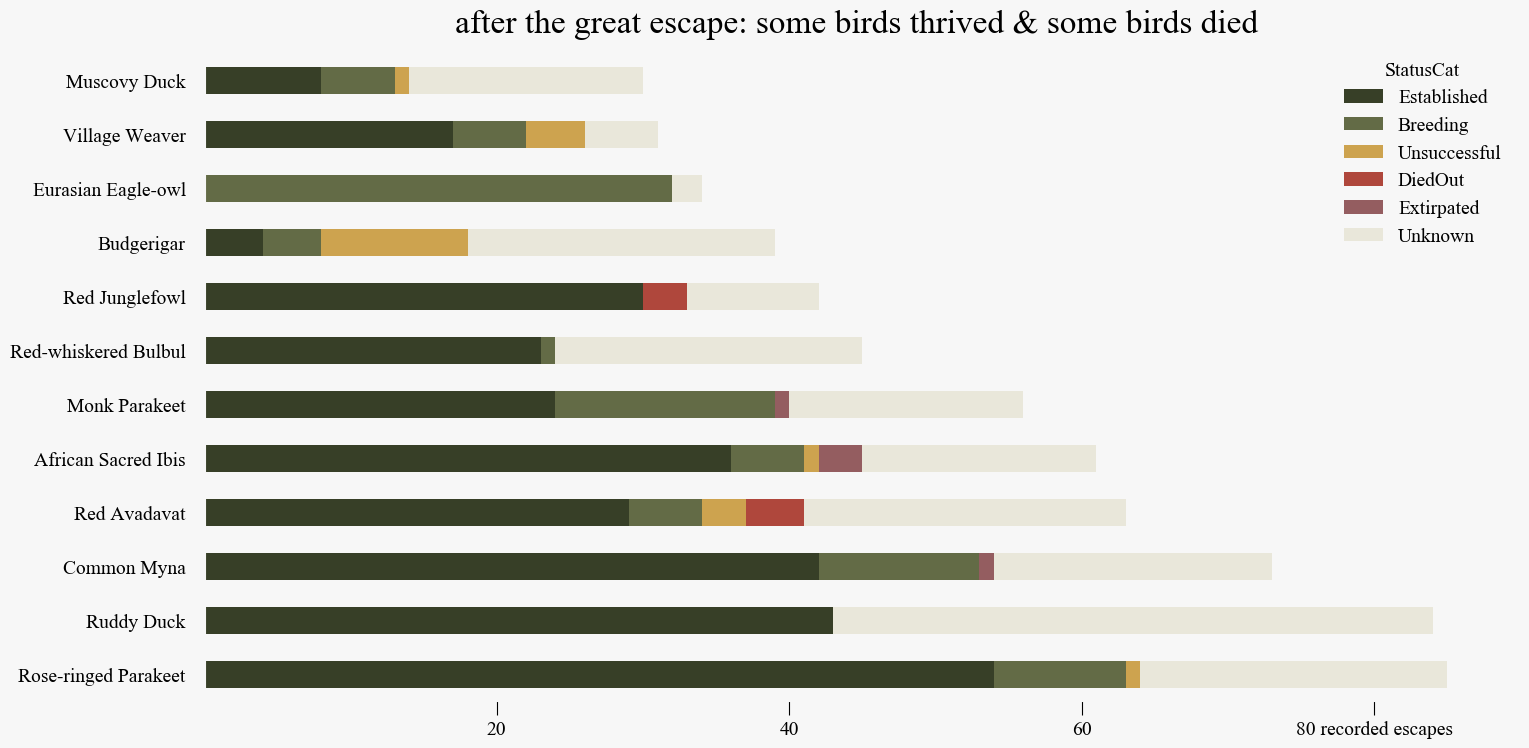

In [91]:
ax = escaped_status.sort_values(by='total_escaped', ascending=False).head(12).plot(kind='barh', x='CommonName', y=['Established','Breeding','Unsuccessful','DiedOut', 'Extirpated', 'Unknown'], stacked=True, figsize=(15,8))
ax.set_title("after the great escape: some birds thrived & some birds died", pad=15)
ax.title.set_fontsize("24")
ax.title.set_fontname("Times New Roman")
ax.set_xticks([20,40,60,80])
ax.set_xticklabels([20,40,60,"80 recorded escapes"])
ax.tick_params(left=False)
ax.set_ylabel("")



plt.savefig("birds-01.pdf")
plt.show()

I chose this dataset because I wanted to do something with nature, subtopic biodiversity. It's the most extensive database covering alien or nonnative avian species (birds!) in the world, and where they have spread. I found it while browsing through Data is Plural hoping for inspiration to strike. The dataset is pretty big (although it still has limitations!) and I spent a lot of time just playing around with it to see what might be interesting. There was one category that explained how the birds had been introduced to a new area, whether intentionally released, as stowaways on ships (!), or as escapees. Escaped birds! That's interesting. So I started focusing on that—which birds were the most likely to escape, whether they successful colonized the new lands, etc.

Most of the work has been deciding what and how to pare the data down. I can't map it so I've tried to focus on things that would be challenging to map anyway, like success rates (are they established? did they die out? were the extirpated?). I found that Budgerigars are one of the most frequent-to-escape birds, but they're not survivers.

Things I still want to do: edit the key to make it look nice; drop the label from the X axis; change the font of the labels; play more with styles. There are also more graphs I could make! There might be too many countries to do a stacked graph of "where birds escape", unless there's a way to lump everything other than the top 5 in "other" (?), but I could perhaps do a stacked graph of what they were supposed to be for (like the bird market, or for a zoo). Open to other ideas, as well!

The limitations of this dataset are that 1) it doesn't tell you where the birds originated, if known; 2) it doesn't say which qualify as "invasive" or what possible threat they pose (the spread of disease or the infringement on natve species). It's possible I could pull this info from somewhere else to enrichen it, but not sure that's necessary for this project and its scope.

In [92]:
df.pivot_table(index="CommonName", columns='IntroPurpose')

CPrecord                                                                                                                                                         IntroducedDateGrouped                                                                                                                                                                Island                                                                                                                                                         MappingDate                                                                                                                                                              RecordID                                                                                                                                                            ReferenceDate                                                                                                    \
IntroPurpose                 Agriculture BiologicalControl CagebirdTrade Conservation Fauna Improvement.Ornamental Hunting Other Unknown.Not applicable Zoos.Nature Reserves.Private Collections           Agriculture BiologicalControl CagebirdTrade Conservation Fauna Improvement.Ornamental Hunting   Other Unknown.Not applicable Zoos.Nature Reserves.Private Collections Agriculture BiologicalControl CagebirdTrade Conservation Fauna Improvement.Ornamental Hunting Other Unknown.Not applicable Zoos.Nature Reserves.Private Collections Agriculture BiologicalControl CagebirdTrade Conservation Fauna Improvement.Ornamental Hunting   Other Unknown.Not applicable Zoos.Nature Reserves.Private Collections Agriculture BiologicalControl CagebirdTrade Conservation Fauna Improvement.Ornamental Hunting    Other Unknown.Not applicable Zoos.Nature Reserves.Private Collections   Agriculture BiologicalControl CagebirdTrade Fauna Improvement.Ornamental Hunting Other Unknown.Not applicable   
CommonName                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
Abdim's Stork                        NaN               NaN           NaN          NaN                          NaN     NaN   NaN               1.000000                                      NaN                   NaN               NaN           NaN          NaN                          NaN     NaN     NaN            1999.000000                                      NaN         NaN               NaN           NaN          NaN                          NaN     NaN   NaN               0.000000                                      NaN         NaN               NaN           NaN          NaN                          NaN     NaN     NaN            1999.000000                                      NaN         NaN               NaN           NaN          NaN                          NaN     NaN      NaN           19706.000000                                      NaN           NaN               NaN           NaN                          NaN     NaN   NaN                    NaN   
Abyssinian Ground-hornbill           NaN               NaN           NaN          NaN                       

In [93]:
escaped_purpose = df_escaped.groupby("CommonName").IntroPurpose.value_counts().unstack().reset_index().fillna(0)
# escaped_purpose.head().plot(kind='barh', stacked=True)

In [94]:
escaped_purpose['total_escaped'] = escaped_purpose.sum(axis=1)

In [95]:
# escaped_purpose.head()

In [96]:
# escaped_purpose.sort_values(by='total_escaped', ascending=False).head(10)

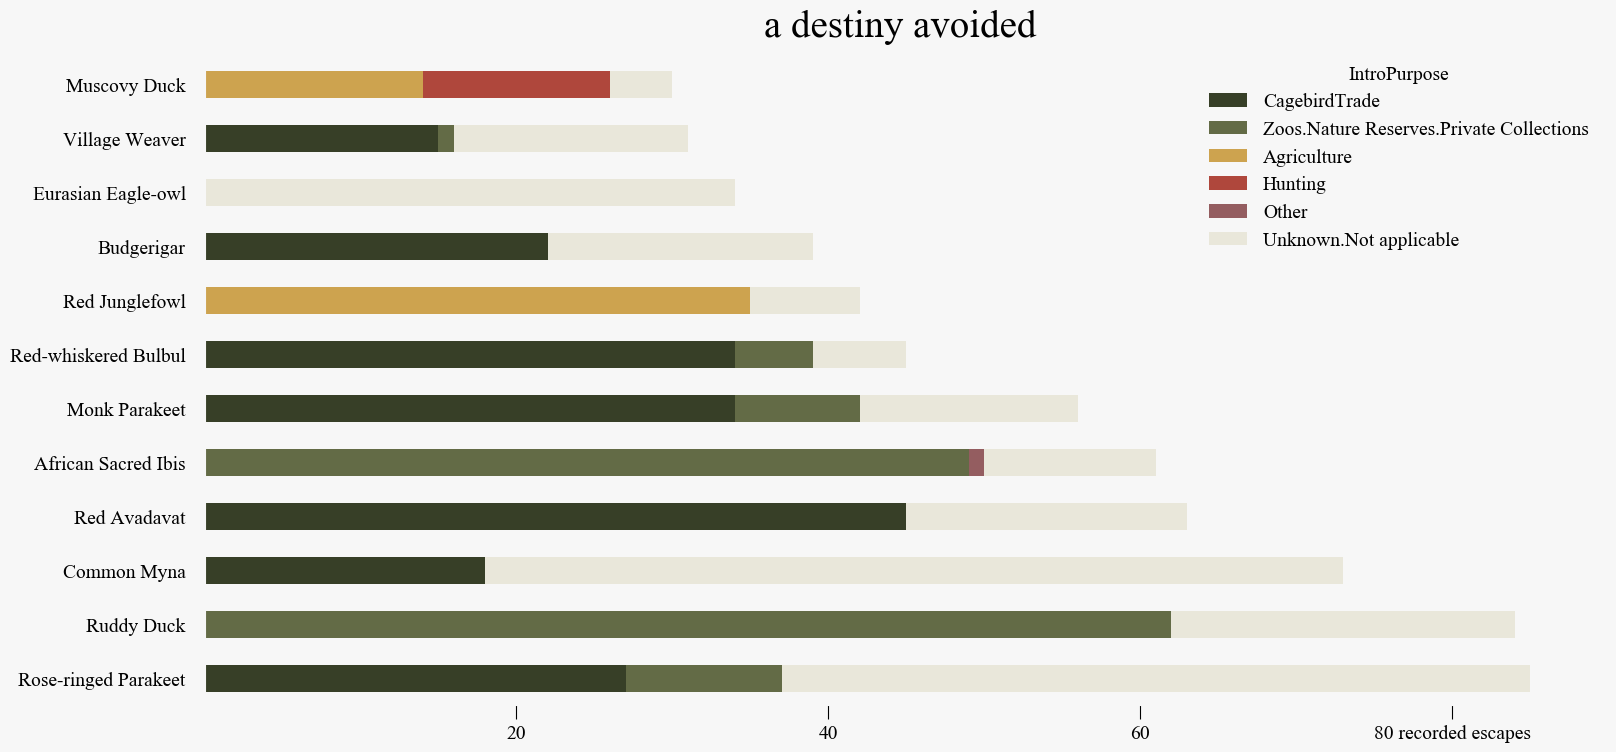

In [97]:
ax = escaped_purpose.sort_values(by='total_escaped', ascending=False).head(12).plot(kind='barh', x='CommonName', y=['CagebirdTrade', 'Zoos.Nature Reserves.Private Collections', 'Agriculture', 'Hunting', 'Other', 'Unknown.Not applicable'], stacked=True, figsize=(16,8))
ax.set_title("a destiny avoided", pad=15)
ax.title.set_fontsize("28")
ax.title.set_fontname("Times New Roman")
ax.set_xticks([20,40,60,80])
ax.set_xticklabels([20,40,60,"80 recorded escapes"])
ax.tick_params(left=False)
ax.set_ylabel("")

plt.savefig("birds-02.pdf")
plt.show()